In [3]:
from neo4j import GraphDatabase

In [4]:
url='bolt://localhost:7687'

In [5]:
pwd='P@$$W0rd!'

In [6]:
driver = GraphDatabase.driver(url, auth=("neo4j", pwd))

In [7]:
graph_query='CALL db.schema.visualization()'

In [260]:
from neo4j import GraphDatabase

url='bolt://localhost:7687'
pwd='P@$$W0rd!'
driver = GraphDatabase.driver(url, auth=("neo4j", pwd))
graph_query='CALL db.schema.visualization()'
with driver.session() as session:
    result = session.run(graph_query)
    print (result.single())

<Record nodes=[<Node element_id='-1042' labels=frozenset({'Debit'}) properties={'name': 'Debit', 'indexes': ['globalStep'], 'constraints': ["Constraint( id=31, name='constraint_182b7cf9', type='UNIQUENESS', schema=(:Debit {id}), ownedIndex=10 )"]}>, <Node element_id='-1037' labels=frozenset({'Bank'}) properties={'name': 'Bank', 'indexes': [], 'constraints': ["Constraint( id=33, name='constraint_329984c3', type='UNIQUENESS', schema=(:Bank {id}), ownedIndex=9 )"]}>, <Node element_id='-1046' labels=frozenset({'Email'}) properties={'name': 'Email', 'indexes': [], 'constraints': ["Constraint( id=42, name='constraint_2b944eb8', type='UNIQUENESS', schema=(:Email {email}), ownedIndex=7 )"]}>, <Node element_id='-1039' labels=frozenset({'Mule'}) properties={'name': 'Mule', 'indexes': [], 'constraints': ["Constraint( id=38, name='constraint_5d4fabb7', type='UNIQUENESS', schema=(:Mule {id}), ownedIndex=17 )"]}>, <Node element_id='-1047' labels=frozenset({'SSN'}) properties={'name': 'SSN', 'indexes

In [7]:
query = 'MATCH(n) RETURN COUNT(n)'

In [8]:
with driver.session() as session:
    result = session.run(query)
    print (result.single()["COUNT(n)"])

533


In [14]:
from neo4j import GraphDatabase

# Neo4j connection details
uri = "bolt://localhost:7687"  # Adjust the URI based on your Neo4j instance
username = "neo4j"              # Neo4j username
password = "P@$$W0rd!"           # Neo4j password

# Create a Neo4j driver instance
driver = GraphDatabase.driver(uri, auth=(username, password))

# Function to visualize the schema
def visualize_schema():
    with driver.session() as session:
        result = session.run("CALL db.schema.visualization()")
        nodes = []
        relationships = []
        
        # Process result
        for record in result:
            nodes.extend(record['nodes'])
            relationships.extend(record['relationships'])
        
        # Output schema details
        print("Nodes in the schema:")
        for node in nodes:
            print(node)

        print("\nRelationships in the schema:")
        for relationship in relationships:
            print(relationship)

# Call the function to visualize the schema
visualize_schema()

# Close the driver connection
driver.close()


Nodes in the schema:
<Node element_id='-106' labels=frozenset({'Debit'}) properties={'name': 'Debit', 'indexes': ['globalStep'], 'constraints': ["Constraint( id=31, name='constraint_182b7cf9', type='UNIQUENESS', schema=(:Debit {id}), ownedIndex=10 )"]}>
<Node element_id='-101' labels=frozenset({'Bank'}) properties={'name': 'Bank', 'indexes': [], 'constraints': ["Constraint( id=33, name='constraint_329984c3', type='UNIQUENESS', schema=(:Bank {id}), ownedIndex=9 )"]}>
<Node element_id='-110' labels=frozenset({'Email'}) properties={'name': 'Email', 'indexes': [], 'constraints': ["Constraint( id=42, name='constraint_2b944eb8', type='UNIQUENESS', schema=(:Email {email}), ownedIndex=7 )"]}>
<Node element_id='-103' labels=frozenset({'Mule'}) properties={'name': 'Mule', 'indexes': [], 'constraints': ["Constraint( id=38, name='constraint_5d4fabb7', type='UNIQUENESS', schema=(:Mule {id}), ownedIndex=17 )"]}>
<Node element_id='-111' labels=frozenset({'SSN'}) properties={'name': 'SSN', 'indexes': 

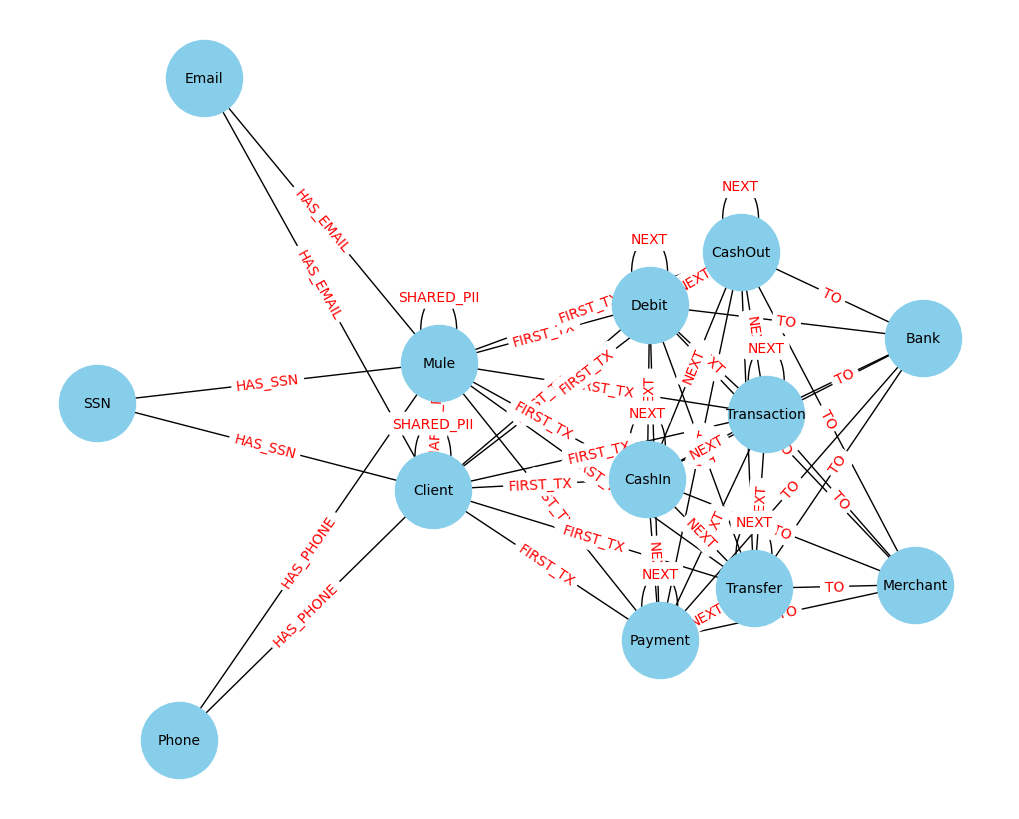

In [108]:
import networkx as nx
import matplotlib.pyplot as plt
from neo4j import GraphDatabase

# Neo4j connection details
uri = "bolt://localhost:7687"
username = "neo4j"
password = "P@$$W0rd!"

# Create a Neo4j driver instance
driver = GraphDatabase.driver(uri, auth=(username, password))

def get_node_labels(tx, node_id):
    result = tx.run("MATCH (n) WHERE id(n) = $node_id RETURN labels(n) AS labels", node_id=node_id)
    record = result.single()
    return record["labels"] if record else []

# Function to visualize the schema graph using NetworkX
def visualize_schema_graph():
    with driver.session() as session:
        result = session.run("CALL db.schema.visualization()")
        nodes = []
        relationships = []
        
        # Process result
        for record in result:
            nodes.extend(record['nodes'])
            relationships.extend(record['relationships'])

    # Create a NetworkX graph
    G = nx.Graph()
       
    #   Add nodes to the graph
    for node in nodes:
            #print(node.get('name'))
            G.add_node(node.element_id, label=node.get('name'))
    
    # Add relationships to the graph
    for relationship in relationships:
        #print(relationship.get('name'))
        G.add_edge(relationship.start_node.element_id, relationship.end_node.element_id, label=relationship.get('name'))

    # Draw the graph using Matplotlib
    pos = nx.spring_layout(G)  # Layout for visualization
    labels = nx.get_node_attributes(G, 'label')
    
    plt.figure(figsize=(10, 8))
    nx.draw(G, pos, labels=labels, with_labels=True, node_size=3000, node_color='skyblue', font_size=10, font_color='black')
    
    # Draw edge labels (relationship types)
    edge_labels = nx.get_edge_attributes(G, 'label')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color='red')

    plt.show()

# Call the function to visualize the schema graph
visualize_schema_graph()

# Close the driver connection
driver.close()


In [314]:
from neo4j import GraphDatabase

# Neo4j connection details
uri = "bolt://localhost:7687"
username = "neo4j"
password = "P@$$W0rd!"

# Create a Neo4j driver instance
driver = GraphDatabase.driver(uri, auth=(username, password))

# Function to get nodes and extract key-value pairs
def extract_node_properties():
    nodes = []  # List to store nodes
    with driver.session() as session:
        # Query to fetch relationships and their connected nodes
        query = """
        MATCH p = (:Client)-[s:SHARED_PII]->(:Client)
        WHERE s.count >= 2
        RETURN s, nodes(p) AS nodes
        """
        result = session.run(query)
        
        for record in result:
            relationship = record["s"]  # Show the SHARED_PII relationship
            node_list = record["nodes"]  # Show the tuple of nodes
            
            # Process each node in the relationship
            for node in node_list:
                node_data = {
                    "element_id": node.id,
                    "labels": list(node.labels),
                    "properties": dict(node)
                }
                nodes.append(node_data)
    
    # Print extracted nodes for verification
    for node in nodes:
        print(f"Node ID: {node['element_id']}")
        print(f"Labels: {node['labels']}")
        print(f"Properties: {node['properties']}")
        print("-" * 40)

# Call the function to extract key-value pairs from nodes
extract_node_properties()

# Close the driver connection
driver.close()


Node ID: 129
Labels: ['Client', 'Mule']
Properties: {'name': 'Evan Pacheco', 'id': '4307389536474215'}
----------------------------------------
Node ID: 318883
Labels: ['Client', 'Mule']
Properties: {'name': 'Tristan Griffith', 'id': '4297626800379477'}
----------------------------------------
Node ID: 1000
Labels: ['Client', 'Mule']
Properties: {'name': 'Sydney Jacobson', 'id': '4047841290742877'}
----------------------------------------
Node ID: 324553
Labels: ['Client', 'Mule']
Properties: {'name': 'Grayson Palmer', 'id': '4361847869567817'}
----------------------------------------
Node ID: 1000
Labels: ['Client', 'Mule']
Properties: {'name': 'Sydney Jacobson', 'id': '4047841290742877'}
----------------------------------------
Node ID: 324526
Labels: ['Client', 'Mule']
Properties: {'name': 'Jack Finch', 'id': '4187135907098538'}
----------------------------------------
Node ID: 1075
Labels: ['Client', 'Mule']
Properties: {'name': 'Mia Huff', 'id': '4001923623053182'}
---------------

C:\Users\henry\AppData\Local\Temp\ipykernel_24096\3403343137.py:30: DeprecationWarning: `id` is deprecated, use `element_id` instead
  "element_id": node.id,


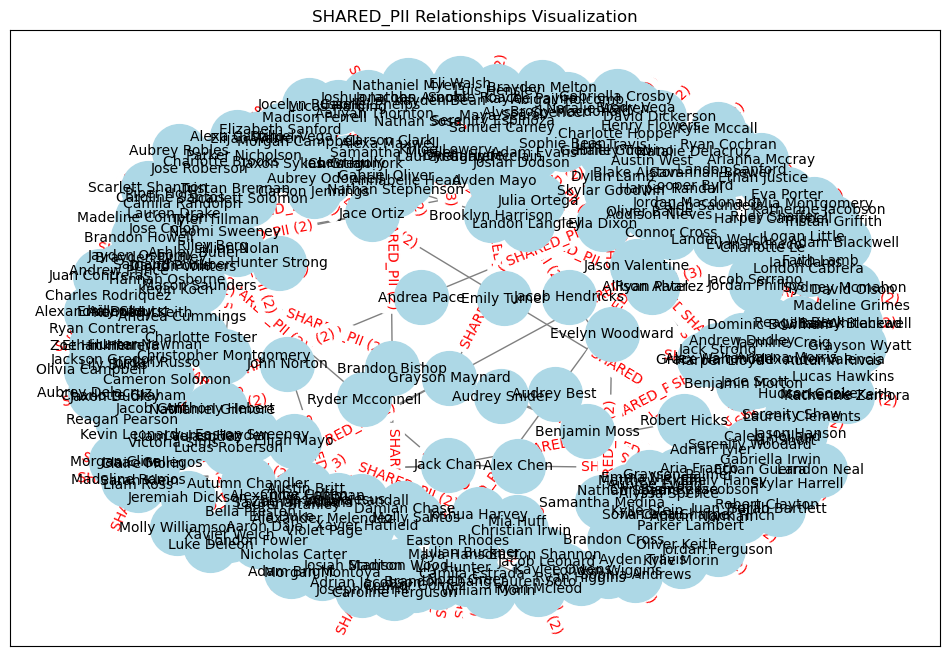

In [328]:
import networkx as nx
import matplotlib.pyplot as plt
from neo4j import GraphDatabase

# Neo4j connection details
uri = "bolt://localhost:7687"
username = "neo4j"
password = "P@$$W0rd!"

# Create a Neo4j driver instance
driver = GraphDatabase.driver(uri, auth=(username, password))

# Function to visualize the results using NetworkX
def visualize_shared_pii():
    # Initialize a directed graph
    G = nx.DiGraph()
    
    with driver.session() as session:
        # Query to fetch relationships and their connected nodes
        query = """
        MATCH p = (:Client)-[s:SHARED_PII]->(:Client)
        WHERE s.count >= 2
        RETURN s, nodes(p) AS nodes
        """
        result = session.run(query)
        
        for record in result:
            relationship = record["s"]  # The SHARED_PII relationship
            node_list = record["nodes"]  # The list of nodes (start and end nodes)
            
            if len(node_list) == 2:  # Ensure we have exactly two nodes
                node1 = node_list[0]
                node2 = node_list[1]
                
                # Extract node properties
                node1_name = node1["name"]
                node2_name = node2["name"]
                
                # Add nodes to the graph
                G.add_node(node1_name, labels=list(node1.labels), properties=dict(node1))
                G.add_node(node2_name, labels=list(node2.labels), properties=dict(node2))
                
                # Add the relationship as an edge
                rel_type = relationship.type
                count = relationship["count"]
                G.add_edge(node1_name, node2_name, type=rel_type, count=count)
    
    # Draw the graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)  # Layout for better visualization

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_color="lightblue", node_size=1500)
    
    # Draw edges
    nx.draw_networkx_edges(G, pos, edge_color="gray", arrowstyle="->", arrowsize=20)
    
    # Draw labels for nodes
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
    
    # Draw edge labels (relationship type and count)
    edge_labels = {(u, v): f"{d['type']} ({d['count']})" for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")
    
    plt.title("SHARED_PII Relationships Visualization")
    plt.show()

# Call the function to visualize
visualize_shared_pii()

# Close the driver when done
driver.close()


In [21]:
import pandas as pd
import  neo4j
import os
from neo4j import GraphDatabase
from graphdatascience import GraphDataScience

URI = os.environ.get("URI", "bolt://localhost:7687")
AUTH = ( "neo4j",  "P@$$W0rd!")
driver = GraphDatabase.driver(URI, auth=AUTH)
gds = GraphDataScience(URI, auth=AUTH)
create_graph_query = '''
MATCH (c:Client)-[ :HAS_EMAIL|HAS_PHONE|HAS_SSN ]-> (n) <-
[ :HAS_EMAIL|HAS_PHONE|HAS_SSN ]-(d:Client)
WHERE id(c) < id(d)
RETURN c.id, d.id, count(*) AS freq
ORDER BY freq DESC
'''
G = gds.run_cypher(create_graph_query)

df = driver.execute_query(
    create_graph_query,
    database_="neo4j",
    result_transformer_=  neo4j.Result.to_df
)

print(type(df))
df

<class 'pandas.core.frame.DataFrame'>


,c.id,d.id,freq
0,4952527271473904,4816336012071985,3
1,4883445100935916,4708373581412325,3
2,4658150168863397,4100374538108184,3
3,4673951123644611,4795773320377768,3
4,4192214340630620,4912097363222923,3
...,...,...,...
754,4910140986334626,4114683318919154,1
755,4454780847105236,4210575070378533,1
756,4721862020593706,4210575070378533,1
757,4445521165797820,4210575070378533,1


In [51]:
'''
import pandas as pd
import  neo4j
import os
from neo4j import GraphDatabase
from graphdatascience import GraphDataScience

URI = os.environ.get("URI", "bolt://localhost:7687")
AUTH = ( "neo4j",  "P@$$W0rd!")
driver = GraphDatabase.driver(URI, auth=AUTH)
gds = GraphDataScience(URI, auth=AUTH)

# Provided query result
query_result = [
    {
        "keys": ["graphName", "nodeCount", "relationshipCount"],
        "length": 3,
        "_fields": [
            "clientClusters",
            {"low": 2433, "high": 0},
            {"low": 1518, "high": 0}
        ],
        "_fieldLookup": {
            "graphName": 0,
            "nodeCount": 1,
            "relationshipCount": 2
        }
    }
]

# Parse the query result into a DataFrame for graph metadata
metadata = []
for record in query_result:
    metadata.append({
        "graphName": record["_fields"][0],
        "nodeCount": record["_fields"][1]["low"],  # Extract the low value
        "relationshipCount": record["_fields"][2]["low"]  # Extract the low value
    })

# Create a metadata DataFrame
metadata_df = pd.DataFrame(metadata)

# Example node and relationship data (mocked for illustration)
# Replace these with real data queries when connecting to Neo4j GDS
nodes_data = [
    {"nodeId": 1, "nodeProperty": "name", "propertyValue": "Evan Pacheco"},
    {"nodeId": 1, "nodeProperty": "id", "propertyValue": "4307389536474215"},
    {"nodeId": 2, "nodeProperty": "name", "propertyValue": "Tristan Griffith"},
    {"nodeId": 2, "nodeProperty": "id", "propertyValue": "4297626800379477"}
]

relationships_data = [
    {"sourceNodeId": 1, "targetNodeId": 2, "relationshipProperty": "count", "propertyValue": 2}
]

# Convert node and relationship data into DataFrames
nodes_df = pd.DataFrame(nodes_data)
relationships_df = pd.DataFrame(relationships_data)

# Display the DataFrames
print("Graph Metadata:")
print(metadata_df)

print("\nNodes DataFrame:")
print(nodes_df)

print("\nRelationships DataFrame:")
print(relationships_df)

# Optionally save to CSV
metadata_df.to_csv("graph_metadata.csv", index=False)
nodes_df.to_csv("nodes.csv", index=False)
relationships_df.to_csv("relationships.csv", index=False)
'''

Graph Metadata:
        graphName  nodeCount  relationshipCount
0  clientClusters       2433               1518

Nodes DataFrame:
   nodeId nodeProperty     propertyValue
0       1         name      Evan Pacheco
1       1           id  4307389536474215
2       2         name  Tristan Griffith
3       2           id  4297626800379477

Relationships DataFrame:
   sourceNodeId  targetNodeId relationshipProperty  propertyValue
0             1             2                count              2


In [5]:
import pandas as pd
import  neo4j
import os
from neo4j import GraphDatabase
from graphdatascience import GraphDataScience

URI = os.environ.get("URI", "bolt://localhost:7687")
AUTH = ( "neo4j",  "P@$$W0rd!")
driver = GraphDatabase.driver(URI, auth=AUTH)
gds = GraphDataScience(URI, auth=AUTH)

#with driver.session() as session:
query1 = '''
        CALL gds.graph.project(
        'clientClusters' ,
            { Client: { label: 'Client' }},
            { SHARED_PII: {type: 'SHARED_PII',
                    orientation: 'UNDIRECTED',
                    properties: {count: {property: 'count' }}
                            }
            })
        YIELD graphName, nodeCount, relationshipCount
        
        CALL gds.wcc.stream('clientCluster', {
             nodeLabels: ['Client'],
             relationshipTypes: ['SHARED_PII'],
             consecutiveIds: true
        })
        YIELD nodeId, componentId
        RETURN gds.util.asNode(nodeId).id AS clientId, componentId AS clusterId

'''
'''
    result = session.run(query1)
    print(list(result))
    print(type(result))    
    print(result.keys())
    print(result.single())
'''
    
df = driver.execute_query(
query1,
database_="neo4j",
result_transformer_=  neo4j.Result.to_df
)
df
    


ClientError: {code: Neo.ClientError.Procedure.ProcedureCallFailed} {message: Failed to invoke procedure `gds.wcc.stream`: Caused by: java.util.NoSuchElementException: Graph with name `clientCluster` does not exist on database `neo4j`. It might exist on another database.}

In [3]:
import pandas as pd
import  neo4j
import os
from neo4j import GraphDatabase
from graphdatascience import GraphDataScience

URI = os.environ.get("URI", "bolt://localhost:7687")
AUTH = ( "neo4j",  "P@$$W0rd!")
driver = GraphDatabase.driver(URI, auth=AUTH)
gds = GraphDataScience(URI, auth=AUTH)

    with driver.session() as session:
        query1 = '''
        CALL gds.graph.project('clientCluster', 'Client', 'RELATIONSHIP', {
            nodeProjection: 'Client',
            relationshipProjection: 'SHARED_PII',
            relationshipProperties: {count: 'count'},
            consecutiveIds: true
        })
        YIELD graphName
        CALL gds.wcc.stream('clientCluster', {
            nodeProjection: 'Client',
            relationshipProjection: 'SHARED_PII',
            relationshipProperties: {count: 'count'},
            consecutiveIds: true
        })
        YIELD nodeId, componentId
        RETURN nodeId, componentId;
    '''
    result = session.run(query1)
    
    # Extract keys (column names)
    print(result)
    

            


IndentationError: unexpected indent (1305534410.py, line 13)

In [205]:
from neo4j import GraphDatabase

# Neo4j connection details
uri = "bolt://localhost:7687"  # Adjust the URI based on your Neo4j instance
username = "neo4j"              # Neo4j username
password = "P@$$W0rd!"           # Neo4j password

# Connect to Neo4j database
driver = GraphDatabase.driver("bolt://localhost:7687", auth=(username, password))

def get_node_labels(tx, node_id):
    result = tx.run("MATCH (n) WHERE id(n) = $node_id RETURN labels(n) AS labels", node_id=node_id)
    record = result.single()
    return record["labels"] if record else []

with driver.session() as session:
    labels = session.execute_read(get_node_labels, 123)  # Replace 123 with the actual node ID
    print(labels)

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: The query used a deprecated function: `id`.} {position: line: 1, column: 17, offset: 16} for query: 'MATCH (n) WHERE id(n) = $node_id RETURN labels(n) AS labels'


['Merchant']


In [330]:
import neo4j
import pandas
from neo4j import GraphDatabase

url='bolt://localhost:7687'
usr_nm = "neo4j"
pwd='P@$$W0rd!'

driver = GraphDatabase.driver(url, auth=(usr_nm, pwd))

query1='CALL db.labels() YIELD label CALL apoc.cypher.run( "MATCH (: " + label + ") RETURN count(*) as count", {} ) YIELD value RETURN label AS Label, value.count AS Count;'

with driver.session() as session:
    result = session.run(query1)
    print (result)
	
query2 = 'CALL db.relationshipTypes() YIELD relationshipType AS type CALL apoc.cypher.run( "MATCH ()-[: " + type + "]-> () RETURN count(*) AS count", {} ) YIELD value RETURN type AS Relationship, value.count AS Count;'

with driver.session() as session:
    result = session.run(query2)
    print (result)

query3 = 'MATCH ( t:Transaction ) WITH count(t) AS globalCnt UNWIND ["CashIn", "CashOut", "Payment", "Debit", "Transfer"] AS txType CALL apoc.cypher.run( "MATCH (t:" + txType + ")	RETURN count(t) AS txCnt", {} )	YIELD value	 RETURN txType, value.txCnt AS NumberOfTransactions, round( toFloat(value.txCnt) / toFloat(globalCnt), 2) AS `%Transactions` ORDER BY `%Transactions` DESC;'
	
pandas_df = driver.execute_query(
    query3,
    database_ = "neo4j",
    result_transformer_ = neo4j.Result.to_df
)
#print(pandas_df)

#pandas.set_option('display.max_columns', 2)
pandas_df

query4 = 'MATCH (c:Client)-[:HAS_EMAIL|HAS_PHONE|HAS_SSN]-> (n) <-[ :HAS_EMAIL|HAS_PHONE|HAS_SSN ]-(d:Client) WHERE id(c) < id(d) RETURN c.id, d.id, count(*) AS freq ORDER BY freq DESC'

pandas_df = driver.execute_query(
    query4,
    database_ = "neo4j",
    result_transformer_ = neo4j.Result.to_df
)
pandas_df

query5 = 'MATCH (c:Client)-[:HAS_EMAIL|HAS_PHONE|HAS_SSN]-> (n) <-[:HAS_EMAIL|HAS_PHONE|HAS_SSN ]-( d:Client )WHERE id(c) <> id(d) RETURN count(DISTINCT c.id) AS freq'

pandas_df = driver.execute_query(
    query5,
    database_ = "neo4j",
    result_transformer_ = neo4j.Result.to_df
)
pandas_df

query6 = '''
MATCH ( c:Client )-[ :HAS_EMAIL|HAS_PHONE|HAS_SSN ] -> (n) <-
[ :HAS_EMAIL|HAS_PHONE|HAS_SSN ]- ( d:Client )
WHERE id(c) < id(d)
WITH c, d, count(*) AS cnt
MERGE (c) - [ :SHARED_PII { count: cnt } ] -> (d);
'''

pandas_df = driver.execute_query(
    query6,
    database_ = "neo4j",
    result_transformer_ = neo4j.Result.to_df
)
pandas_df

Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: The query used a deprecated function: `id`.} {position: line: 1, column: 107, offset: 106} for query: 'MATCH (c:Client)-[:HAS_EMAIL|HAS_PHONE|HAS_SSN]-> (n) <-[ :HAS_EMAIL|HAS_PHONE|HAS_SSN ]-(d:Client) WHERE id(c) < id(d) RETURN c.id, d.id, count(*) AS freq ORDER BY freq DESC'
Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: The query used a deprecated function: `id`.} {position: line: 1, column: 115, offset: 114} for query: 'MATCH (c:Client)-[:HAS_EMAIL|HAS_PHONE|HAS_SSN]-> (n) <-[ :HAS_EMAIL|HAS_PHONE|HAS_SSN ]-(d:Client) WHERE id(c) < id(d) RETURN c.id, d.i

""


Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: The query used a deprecated function: `id`.} {position: line: 4, column: 15, offset: 130} for query: '\n        MATCH (c:Client)-[:HAS_EMAIL|HAS_PHONE|HAS_SSN]-> (n) <-\n        [:HAS_EMAIL|HAS_PHONE|HAS_SSN]-(d:Client)\n        WHERE id(c) < id(d)\n        RETURN c.id, d.id, count(*) AS freq\n        ORDER BY freq DESC;\n        '
Received notification from DBMS server: {severity: WARNING} {code: Neo.ClientNotification.Statement.FeatureDeprecationWarning} {category: DEPRECATION} {title: This feature is deprecated and will be removed in future versions.} {description: The query used a deprecated function: `id`.} {position: line: 4, column: 23, offset: 138} for query: '\n        MATCH (c:Client)-[:HAS_EMAIL|HAS_PHONE|HAS_SSN]-> (n) <-\n        [:HAS_

KeyError: 'SHARED_PII'

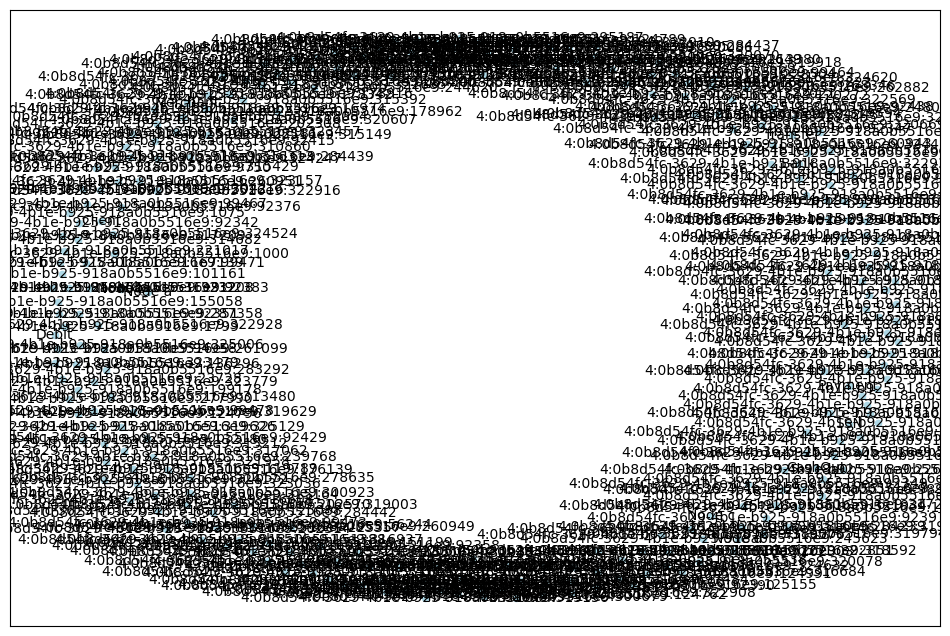

In [326]:
import networkx as nx
import matplotlib.pyplot as plt
from neo4j import GraphDatabase

# Neo4j connection details
uri = "bolt://localhost:7687"  # Adjust the URI based on your Neo4j instance
usr_nm = "neo4j"              # Neo4j username
pwd = "P@$$W0rd!"           # Neo4j password

driver = GraphDatabase.driver(uri, auth=(usr_nm, pwd))

def visualize_schema():

    # Use NetworkX for visualization
    G = nx.DiGraph()
    
    """
    Visualize the schema of Neo4j nodes and relationships.
    """    

    with driver.session() as session:
        # Query to get labels and their counts
        label_count_query = '''
        CALL db.labels() YIELD label
        CALL apoc.cypher.run("MATCH (:`" + label + "`) RETURN count(*) AS count", {}) YIELD value
        RETURN label AS Label, value.count AS Count;
        '''
        # Fetch node labels
        label_count_results = session.run(label_count_query)
        for record in label_count_results:
            label = record["Label"]
            count = record["Count"]
            G.add_node(label, size=count)
    
        # Query to get relationship types and their counts
        relationship_count_query = '''
        CALL db.relationshipTypes() YIELD relationshipType AS type
        CALL apoc.cypher.run("MATCH ()-[:`" + type + "`]->() RETURN count(*) AS count", {}) YIELD value
        RETURN type AS Relationship, value.count AS Count;
        '''
        # Fetch relationships
        relationship_count_results = session.run(relationship_count_query)
        for record in relationship_count_results:
            rel_type = record["Relationship"]
            count = record["Count"]
            G.add_edge("Node a", "Node b", type=rel_type, weight=count)  # Replace "Node A" and "Node B" as needed

        count_distinct_desc_query = '''
        MATCH (c:Client)-[:HAS_EMAIL|HAS_PHONE|HAS_SSN]-> (n) <-
        [:HAS_EMAIL|HAS_PHONE|HAS_SSN]-(d:Client)
        WHERE id(c) < id(d)
        RETURN c.id, d.id, count(*) AS freq
        ORDER BY freq DESC;
        '''
        # Fetch relationships
        count_distinct_desc_results = session.run(count_distinct_desc_query)
        for record in count_distinct_desc_results:
            #rel_type = record["relashionships"]
            freq = record["freq"]
            #G.add_edge("Node c", "Node d", type=rel_type, weight=freq)  # Replace "Node A" and "Node B" as needed
            G.add_edge("Node c", "Node d", weight=freq)  # Replace "Node C" and "Node D" as needed
        
        count_distinct_query = '''
        MATCH (c:Client)-[:HAS_EMAIL|HAS_PHONE|HAS_SSN]-> (n) <-[:HAS_EMAIL|HAS_PHONE|HAS_SSN ]-(d:Client)
        WHERE id(c) <> id(d) 
        RETURN count(DISTINCT c.id) AS freq
        '''
        # Fetch relationships
        count_distinct_results = session.run(count_distinct_query)
        for record in count_distinct_results:
            #rel_type = record["relashionships"]
            freq = record["freq"]
            #G.add_edge("Node c", "Node d", type=rel_type, weight=freq)  # Replace "Node A" and "Node B" as needed
            G.add_edge("Node c", "Node d", weight=freq)  # Replace "Node C" and "Node D" as needed

        shared_pii_count_query = '''
        MATCH ( c:Client )-[ :HAS_EMAIL|HAS_PHONE |HAS_SSN ] -> (n) <-
        [ :HAS_EMAIL|HAS_PHONE|HAS_SSN ]- ( d:Client )
        WHERE id(c) < id(d)
        WITH c, d, count(*) AS cnt
        MERGE (c) - [ :SHARED_PII { count: cnt } ] -> (d);
        '''
        # Fetch relationships
        shared_pii_count_results = session.run(shared_pii_count_query)
        for record in shared_pii_count_results:
            #rel_type = record["relashionships"]
            cnt = record["cnt"]
            #G.add_edge("Node c", "Node d", type=rel_type, weight=freq)  # Replace "Node A" and "Node B" as needed
            G.add_edge("Node c", "Node d", weight=cnt)  # Replace "Node C" and "Node D" as needed


        return_node_shared_pii_query = '''
        MATCH (n)-[r:SHARED_PII]->(p) RETURN r, n, p;
        '''
        # Fetch relationships
        return_node_shared_pii_results = session.run(return_node_shared_pii_query)
        for record in return_node_shared_pii_results:
            #rel_type = record["relashionships"]
            r = record.get('r')
            n = record.get('n')
            p = record.get('p')
            #G.add_edge("Node c", "Node d", type=rel_type, weight=freq)  # Replace "Node A" and "Node B" as needed
            G.add_node(n.element_id)
            G.add_edge("Node c", "Node d", label=p, type=r)  # Replace "Node C" and "Node D" as needed
    
    # Plot the schema graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)  # Layout for better visualization
    #node_sizes = [data["size"] * 10 for _, data in G.nodes(data=True)]  # Scale node sizes
    nx.draw_networkx_nodes(G, pos, node_size=20, node_color="lightblue")
    nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=20, edge_color="gray")
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
    
    # Draw edge labels (relationship types)
    edge_labels = {(u, v): d[rel_type] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

    plt.title("Neo4j Schema Visualization")
    plt.show()

# Call the function to visualize the schema
visualize_schema()

# Close the driver when done
driver.close()


  name: Debit
  indexes: ['globalStep']
  constraints: ["Constraint( id=31, name='constraint_182b7cf9', type='UNIQUENESS', schema=(:Debit {id}), ownedIndex=10 )"]
  name: Bank
  indexes: []
  constraints: ["Constraint( id=33, name='constraint_329984c3', type='UNIQUENESS', schema=(:Bank {id}), ownedIndex=9 )"]
  name: Email
  indexes: []
  constraints: ["Constraint( id=42, name='constraint_2b944eb8', type='UNIQUENESS', schema=(:Email {email}), ownedIndex=7 )"]
  name: Mule
  indexes: []
  constraints: ["Constraint( id=38, name='constraint_5d4fabb7', type='UNIQUENESS', schema=(:Mule {id}), ownedIndex=17 )"]
  name: SSN
  indexes: []
  constraints: ["Constraint( id=41, name='constraint_2e3b4d82', type='UNIQUENESS', schema=(:SSN {ssn}), ownedIndex=12 )"]
  name: Payment
  indexes: ['globalStep']
  constraints: ["Constraint( id=30, name='constraint_80d41635', type='UNIQUENESS', schema=(:Payment {id}), ownedIndex=14 )"]
  name: Merchant
  indexes: []
  constraints: ["Constraint( id=40, name=

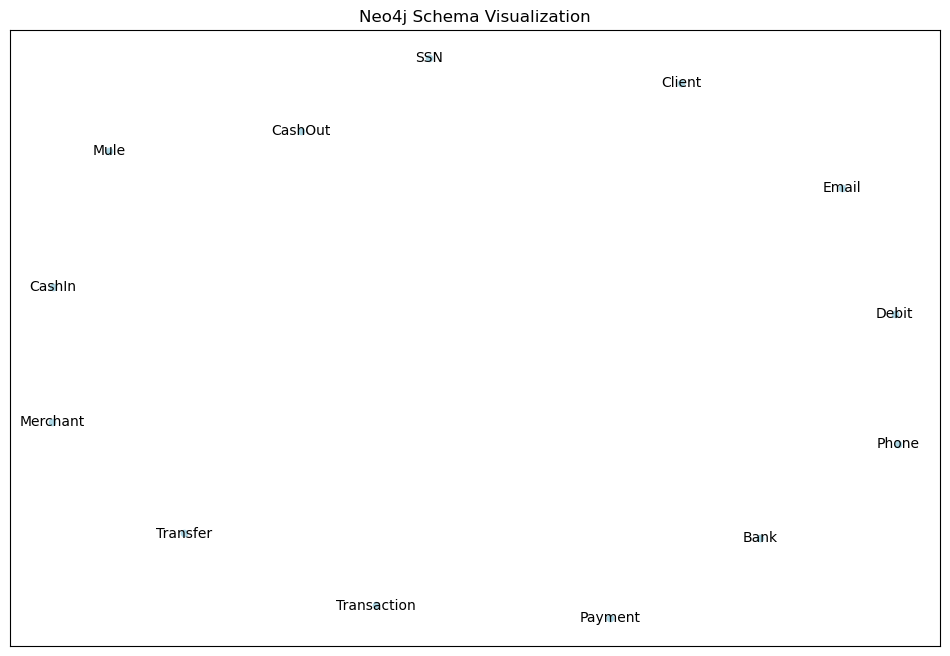

In [213]:
import networkx as nx
import matplotlib.pyplot as plt
from neo4j import GraphDatabase
from neo4j.graph import Node  # Optional, for type hints

# Initialize the Neo4j driver
driver = GraphDatabase.driver("bolt://localhost:7687", auth=("neo4j", "P@$$W0rd!"))

def visualize_neo4j_schema():
    """
    Visualize the schema of Neo4j nodes and relationships.
    """
    relationship_query = '''
    CALL db.schema.visualization() YIELD nodes, relationships
    RETURN nodes, relationships;
    '''
    
    # Use NetworkX for visualization
    G = nx.DiGraph()

    with driver.session() as session:
        #try:
        # Fetch relationships and nodes
        relationship_results = session.run(relationship_query)
            
        for record in relationship_results:
            # Add nodes
            if record.get("nodes"):
                for nodes in record["nodes"]:
                    #print(nodes)
                    label = nodes.get('name')
                    G.add_node(label, size=10)
                # Extract and print values
                    #for node in nodes:
                        #print(node)
                        #print(list(node))  # Convert frozenset to list for display
                        #print("Properties:")
                    for key, value in nodes.items():
                        print(f"  {key}: {value}")
                        
                        # Example to handle specific keys like 'constraints' if present
                        if 'constraints' in nodes.items():
                            print("Constraints:")
                            for constraint in nodes['constraints']:
                                for k, v in constraint.items():
                                    print(f"    {k}: {v}")
        '''
                # Add relationships
                if record.get("relationships"):
                    for rel in record["relationships"]:
                        start_node = rel["start"].get("node")[0]
                        end_node = rel["end"].get("node")[0]
                        rel_type = rel.get("type")
        '''      
                            
                        #if start_node and end_node:
                            #G.add_edge(start_node, end_node, type=rel_type)
                        #else:
                            #print(f"Missing start or end node in: {rel}")
        #except Exception as e:
            #print(f"An error occurred: {e}")
            #return

    # Plot the schema graph
    plt.figure(figsize=(12, 8))
    pos = nx.spring_layout(G)  # Layout for better visualization
    #node_sizes = [data["size"] * 100 for _, data in G.nodes(data=True)]  # Scale node sizes
    nx.draw_networkx_nodes(G, pos, node_size=20, node_color="lightblue")
    nx.draw_networkx_edges(G, pos, arrowstyle="->", arrowsize=20, edge_color="gray")
    nx.draw_networkx_labels(G, pos, font_size=10, font_color="black")
    
    # Draw edge labels (relationship types)
    edge_labels = {(u, v): d["type"] for u, v, d in G.edges(data=True)}
    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_color="red")

    plt.title("Neo4j Schema Visualization")
    plt.show()

# Call the function to visualize the schema
visualize_neo4j_schema()

# Close the driver when done
driver.close()